In [2]:
%matplotlib inline

In [2]:
# coding=utf-8
import pandas as pd
import os 
import arrow as ar
import  matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pyplotz.pyplotz import PyplotZ #一个优化matplotlib函数操作的package
import numpy as np
plt.style.use('fivethirtyeight')
from palettable.colorbrewer.sequential import Blues_9,BuGn_9,Greys_3,PuRd_5#三种配色的调色板
import warnings
myfont = matplotlib.font_manager.FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc',size = 18)
warnings.filterwarnings('ignore')
os.chdir('/home/user1/tianchi-CBE')
pltz=PyplotZ()

train=pd.read_csv('./data/Antai_AE_round1_train_20190626.csv')
test=pd.read_csv('./data/Antai_AE_round1_test_20190626.csv')
item_attr=pd.read_csv('./data/Antai_AE_round1_item_attr_20190626.csv')

In [4]:
print('训练集(xx国)一共有'+str(len(train))+'个样本')
print('测试集(yy国)一共有'+str(len(test))+'个样本')
print('商品属性表一共有'+str(len(item_attr))+'个商品')

训练集(xx国)一共有12868509个样本
测试集(yy国)一共有166832个样本
商品属性表一共有2832669个商品


In [5]:
print('训练集(xx国)中有'+str(len(train['item_id'].unique()))+'不同的商品,以及'+str(len(train['buyer_admin_id'].unique()))+'个不同的用户')
print('测试集(yy国)中有'+str(len(test['item_id'].unique()))+'不同的商品,以及'+str(len(test['buyer_admin_id'].unique()))+'个不同的用户')
print('商品属性表中商品有'+str(len(item_attr['cate_id'].unique()))+'个不同的类别,以及'+str(len(item_attr['store_id'].unique()))+'个不同的店铺')

训练集(xx国)中有2812048不同的商品,以及809213个不同的用户
测试集(yy国)中有104735不同的商品,以及11398个不同的用户
商品属性表中商品有4243个不同的类别,以及95105个不同的店铺


In [6]:
#探查下出现频率最高的各类型id
print('训练集(xx国)中出现次数最高的各类型id:')
for x in ['buyer_admin_id','item_id','create_order_time']:
    print('对于'+x+':')
    print(train[x].value_counts().head())

训练集(xx国)中出现次数最高的各类型id:
对于buyer_admin_id:


10828801    42751
10951390    23569
11223615    19933
10935073    13820
10683645    13210
Name: buyer_admin_id, dtype: int64
对于item_id:


12691565    112659
12824199     35979
12673275     14668
12891086     12335
634028        8226
Name: item_id, dtype: int64
对于create_order_time:


2018-08-27 00:05:44    221
2018-08-27 00:08:14    220
2018-08-27 00:04:34    213
2018-08-27 00:05:24    206
2018-08-27 00:03:19    203
Name: create_order_time, dtype: int64


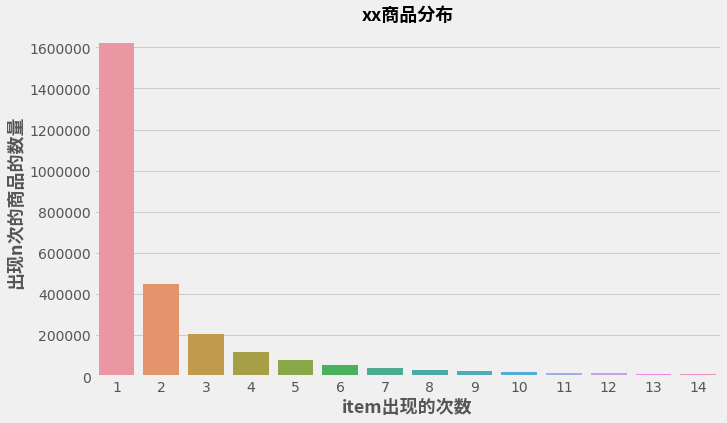

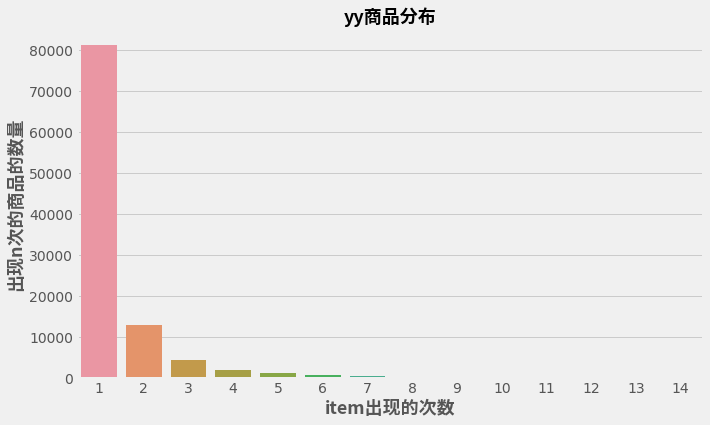

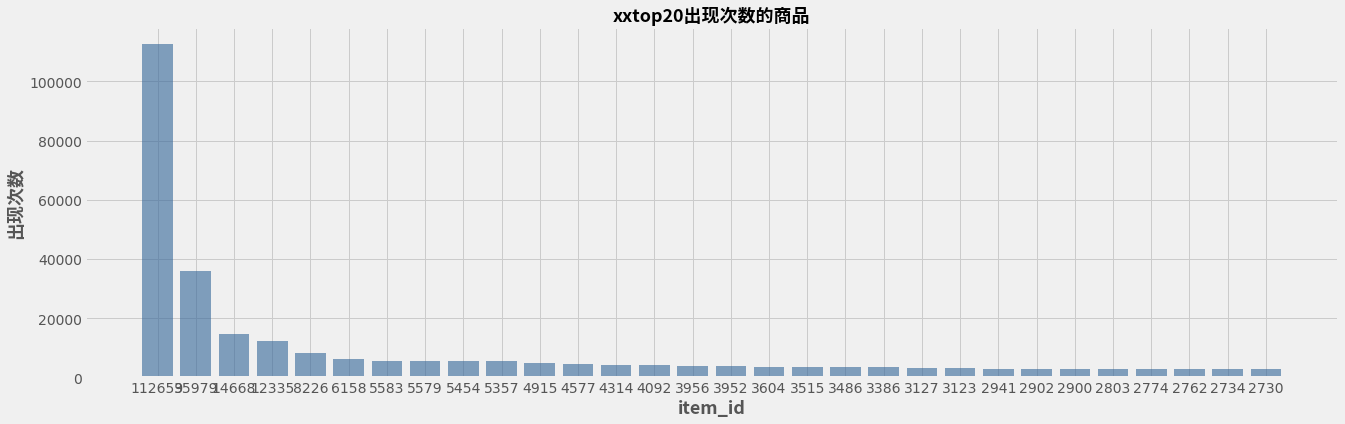

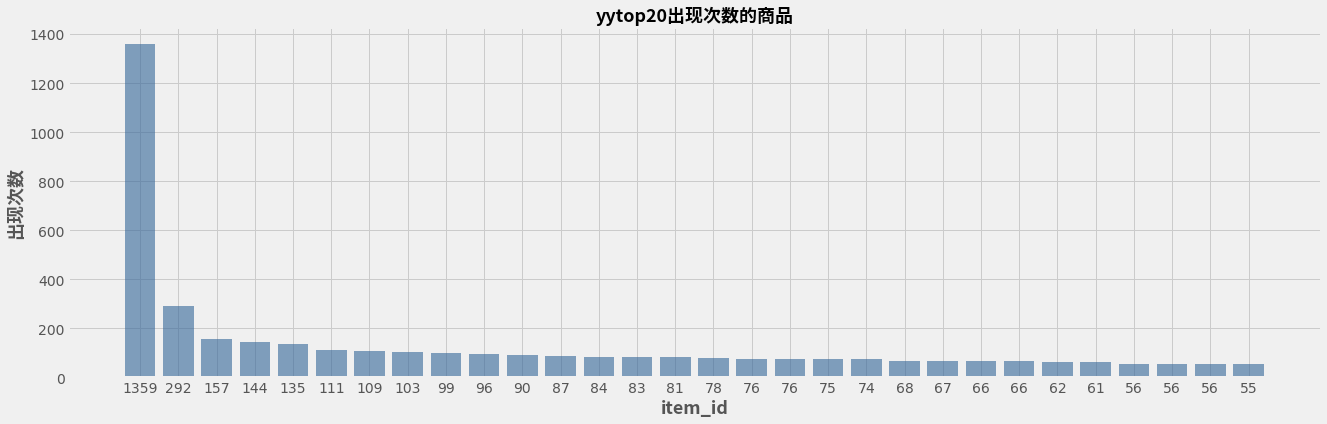

In [49]:

fig, axis1 = plt.subplots(1,1,figsize=(10,6))
item_num=pd.DataFrame({'item_id_num':train['item_id'].value_counts().values})
sns.countplot(x='item_id_num',data=item_num[item_num['item_id_num']<15])
axis1.set_xlabel(u'item出现的次数',fontproperties=myfont)
axis1.set_ylabel(u'出现n次的商品的数量',fontproperties=myfont)
axis1.set_title(u'xx商品分布',fontproperties=myfont)

fig, axis1 = plt.subplots(1,1,figsize=(10,6))
item_num=pd.DataFrame({'item_id_num':test['item_id'].value_counts().values})
sns.countplot(x='item_id_num',data=item_num[item_num['item_id_num']<15])
axis1.set_xlabel('item出现的次数',fontproperties=myfont)
axis1.set_ylabel('出现n次的商品的数量',fontproperties=myfont)
axis1.set_title('yy商品分布',fontproperties=myfont)

fig, axis1 = plt.subplots(1,1,figsize=(20,6))
item_value=pd.DataFrame(train.item_id.value_counts()).reset_index().head(30)
axis1.set_xlabel('item_id',fontproperties=myfont)
axis1.set_ylabel('出现次数',fontproperties=myfont)
axis1.set_title('xxtop20出现次数的商品',fontproperties=myfont)
y_pos = np.arange(len(item_value))
# y_pos:柱的位置
plt.bar(y_pos, item_value['item_id'], color=(0.2, 0.4, 0.6, 0.6))
# pltz.xticks：贴标签
pltz.xticks(y_pos, item_value['item_id'])
pltz.show()

fig, axis1 = plt.subplots(1,1,figsize=(20,6))
item_value=pd.DataFrame(test.item_id.value_counts()).reset_index().head(30)
axis1.set_xlabel('item_id',fontproperties=myfont)
axis1.set_ylabel('出现次数',fontproperties=myfont)
axis1.set_title('yytop20出现次数的商品',fontproperties=myfont)
y_pos = np.arange(len(item_value))
# y_pos:柱的位置
plt.bar(y_pos, item_value['item_id'], color=(0.2, 0.4, 0.6, 0.6))
# pltz.xticks：贴标签
pltz.xticks(y_pos, item_value['item_id'])
pltz.show()


In [ ]:
可以看出两国热销商品的分布完全不同

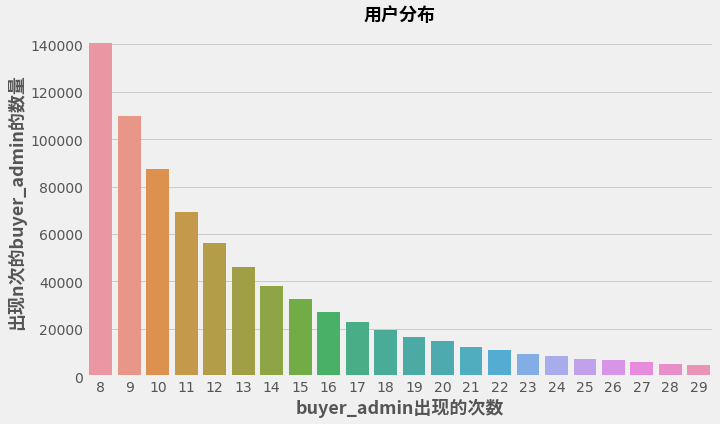

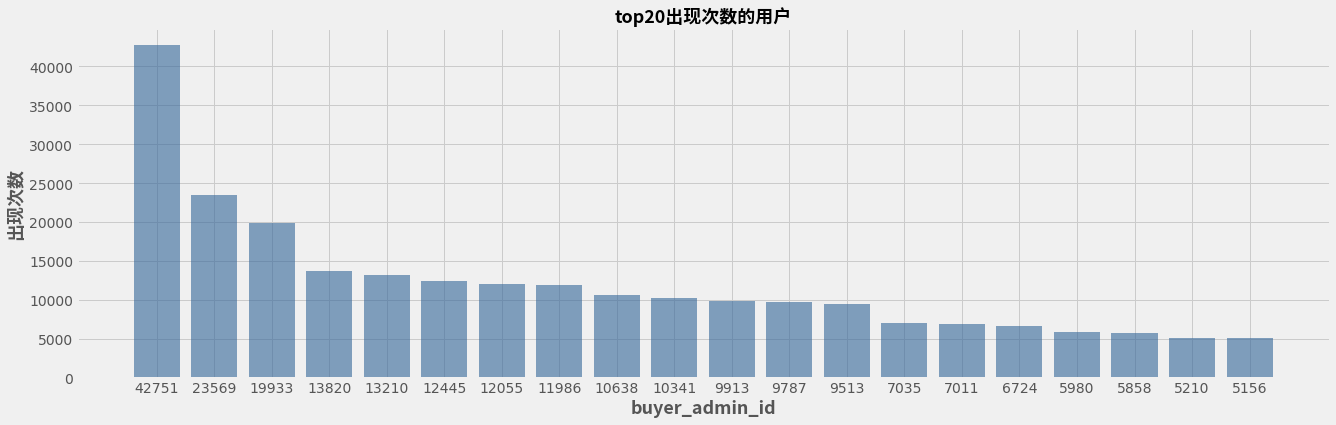

In [50]:
fig, axis1 = plt.subplots(1, 1, figsize=(10, 6))
buyer_admin_num = pd.DataFrame({'buyer_admin_id_num': train['buyer_admin_id'].value_counts().values})
sns.countplot(x='buyer_admin_id_num', data=buyer_admin_num[buyer_admin_num['buyer_admin_id_num'] < 30])
axis1.set_xlabel('buyer_admin出现的次数',fontproperties=myfont)
axis1.set_ylabel('出现n次的buyer_admin的数量',fontproperties=myfont)
axis1.set_title('用户分布',fontproperties=myfont)

fig, axis1 = plt.subplots(1, 1, figsize=(20, 6))

buyer_admin_value = pd.DataFrame(train.buyer_admin_id.value_counts()).reset_index().head(20)
axis1.set_xlabel('buyer_admin_id',fontproperties=myfont)
axis1.set_ylabel('出现次数',fontproperties=myfont)
axis1.set_title('top20出现次数的用户',fontproperties=myfont)
y_pos = np.arange(len(buyer_admin_value))

plt.bar(y_pos, buyer_admin_value['buyer_admin_id'], color=(0.2, 0.4, 0.6, 0.6))
pltz.xticks(y_pos, buyer_admin_value['buyer_admin_id'])
pltz.show()

In [16]:
for x in ['item_price']:
    print(item_attr[x].value_counts())

200      75872
500      61283
100      33826
400      27670
300      26044
199      18032
1000     16739
700      12028
101      11972
121      11833
499      11437
160      11322
800      11243
151      11080
201      10846
130      10577
150      10435
900      10252
170      10076
600      10004
190       9970
111       9669
140       9654
120       9643
250       9048
126       8653
90        8575
180       8530
501       8368
181       8364
         ...  
17309        1
7062         1
18251        1
13203        1
15250        1
17308        1
10048        1
15251        1
17307        1
19354        1
15248        1
11154        1
19349        1
17296        1
17300        1
9119         1
13213        1
15260        1
19346        1
11167        1
15261        1
13212        1
15262        1
19344        1
15263        1
13214        1
16196        1
14149        1
19345        1
13301        1
Name: item_price, Length: 20230, dtype: int64


Text(0.5, 1.0, '商品价格分布(全部)')

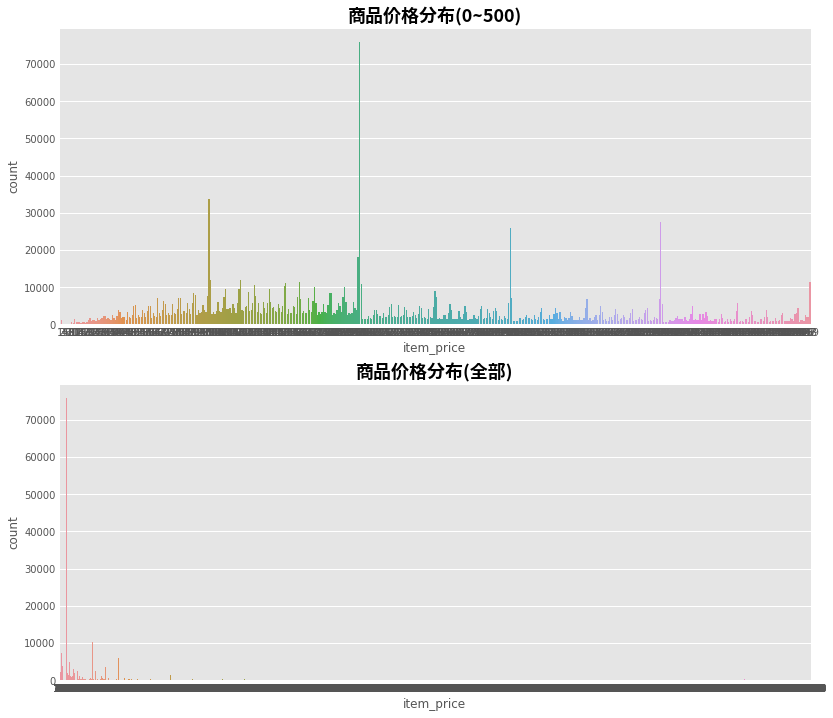

In [4]:
f,ax=plt.subplots(2,1,figsize=(12,12))
sns.countplot('item_price',data=item_attr[item_attr['item_price'] < 500],ax = ax[0])
ax[0].set_title('商品价格分布(0~500)',fontproperties=myfont)

sns.countplot('item_price',data=item_attr,ax = ax[1])
ax[1].set_title('商品价格分布(全部)',fontproperties=myfont)

Text(0.5, 1, '商品价格')

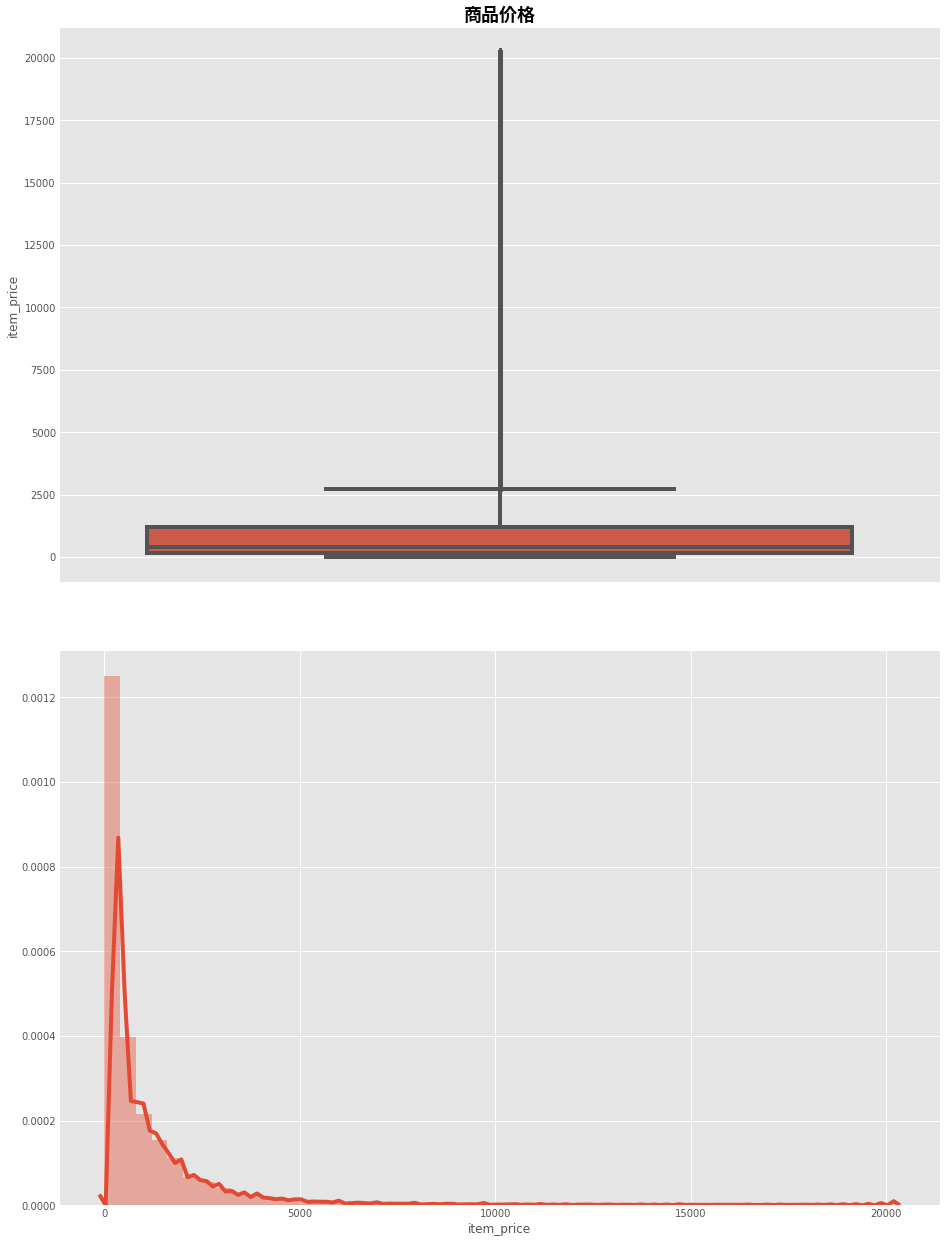

In [3]:
plt.style.use('ggplot')
f,ax=plt.subplots(2,1,figsize=(14,18))
plt.tight_layout(5)
sns.boxplot(y=item_attr['item_price'],ax = ax[0])
sns.distplot(item_attr['item_price'],ax=ax[1])
ax[0].set_title('商品价格',fontproperties=myfont)